In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

file1 = 'athletes.csv'
file2 = 'countries.csv'

athletes=pd.read_csv(file1)
countries = pd.read_csv(file2)
countries.rename(columns = {'code':'nationality'}, inplace = True)

full_athlete_df = pd.merge(athletes,countries,how='inner',on ='nationality')
full_athlete_df['sex'] = full_athlete_df.sex.map(dict(female=1, male=0))

full_athlete_df['Won_a_medal'] = full_athlete_df['gold'] + full_athlete_df['silver'] + full_athlete_df['bronze']
full_athlete_df['Won_a_medal'].values[full_athlete_df['Won_a_medal'].values > 0] = 1
full_athlete_df['dob'] = pd.to_datetime(full_athlete_df.dob)
full_athlete_df['dob'] = full_athlete_df['dob'].mask(full_athlete_df['dob'].dt.year > 2016,
                                               full_athlete_df['dob'] - pd.DateOffset(years=100))
full_athlete_df=full_athlete_df.drop(['gold', 'silver','bronze','id','name','nationality'], axis=1)
full_athlete_df["dob"]= [2014-x.year  for x in full_athlete_df["dob"]]
full_athlete_df.columns



Index(['sex', 'dob', 'height', 'weight', 'sport', 'country', 'population',
       'gdp_per_capita', 'Won_a_medal'],
      dtype='object')

# **Part 1**

In [2]:
##Q1

full_athlete_df= full_athlete_df.dropna()
df=full_athlete_df.sample(n=200)

athletes_1000 = pd.concat([ full_athlete_df, df]).drop_duplicates(keep=False)

athletes_1000 = athletes_1000.sample(n=1000)

df[["height"]].describe()


,height
count,200.000000
mean,1.770650
std,0.118373
min,1.430000
25%,1.690000
50%,1.770000
75%,1.850000
max,2.100000


In [3]:
#Q2.1
fi = 1.76

p_z1_and_y1 =len(df[(df.Won_a_medal==0) & (df.height > 1.76)])/200
p_y1 = len(df[(df.Won_a_medal==0)])/200
p_z1_give_y1 = p_z1_and_y1/p_y1

p_z1_and_y2 =len(df[(df.Won_a_medal==1) & (df.height > 1.76)])/200
p_y2 = len(df[(df.Won_a_medal==1)])/200
p_z1_give_y2 = p_z1_and_y2/p_y2

eta1 = np.log(p_z1_give_y1/(1-p_z1_give_y1))
eta2 = np.log(p_z1_give_y2/(1-p_z1_give_y2))

log_ratio = eta1 - eta2

B = 400
log_ratio_list = []
for i in range(B):
  bootstrap = df.sample(n=200,replace=True)
  p_z1_and_y1 =len(bootstrap[(bootstrap.Won_a_medal==0) & (bootstrap.height > 1.76)])/200
  p_y1 = len(bootstrap[(bootstrap.Won_a_medal==0)])/200
  p_z1_give_y1 = p_z1_and_y1/p_y1

  p_z1_and_y2 =len(bootstrap[(bootstrap.Won_a_medal==1) & (bootstrap.height > 1.76)])/200
  p_y2 = len(bootstrap[(bootstrap.Won_a_medal==1)])/200
  p_z1_give_y2 = p_z1_and_y2/p_y2

  eta1 = np.log(p_z1_give_y1/(1-p_z1_give_y1))
  eta2 = np.log(p_z1_give_y2/(1-p_z1_give_y2))
  ans = eta1 - eta2
  log_ratio_list.append(ans)

log_ratio_list = np.array(sorted(log_ratio_list))
low_q = np.quantile(log_ratio_list, 0.025)
up_q = np.quantile(log_ratio_list, 0.975)
CI_quantile = [low_q, up_q]
print("estimation of log ratio is:",log_ratio)

print(f'Confidence interval for log ratio based on Bootstrap quantile is : {CI_quantile}')


estimation of log ratio is: -0.5518937418415119
Confidence interval for log ratio based on Bootstrap quantile is : [-1.2774394415552985, 0.22063792595525622]


In [4]:
#Q2.2

from numpy.core.fromnumeric import mean
import numpy as np
from scipy.stats import beta

s1 =len(df[(df.Won_a_medal==0) & (df.height > 1.76)])
s2 = len(df[(df.Won_a_medal==1) & (df.height > 1.76)])
n1 = len(df[(df.Won_a_medal==0)])
n2 =  len(df[(df.Won_a_medal==1)])
p1_list =[]
p2_list = []
log_ratio_list = []
for i in range(B):
  p1 = np.random.beta(s1+1,n1-s1+1)
  p2 = np.random.beta(s2+1,n2-s2+1)
  eta1 = np.log(p1/(1-p1))
  eta2 = np.log(p2/(1-p2))
  log_ratio_list.append(eta1 - eta2)


log_ratio = np.mean(log_ratio_list)
log_ratio_list = np.array(sorted(log_ratio_list))
low_q = np.quantile(log_ratio_list, 0.025)
up_q = np.quantile(log_ratio_list, 0.975)
CI_quantile = [low_q, up_q]
print("estimation of log ratio is:",log_ratio)

print(f'Credible interval for log ratio based on uniform prior is : {CI_quantile}')



estimation of log ratio is: -0.539870328126728
Credible interval for log ratio based on uniform prior is : [-1.3102090222581235, 0.19804953219861435]


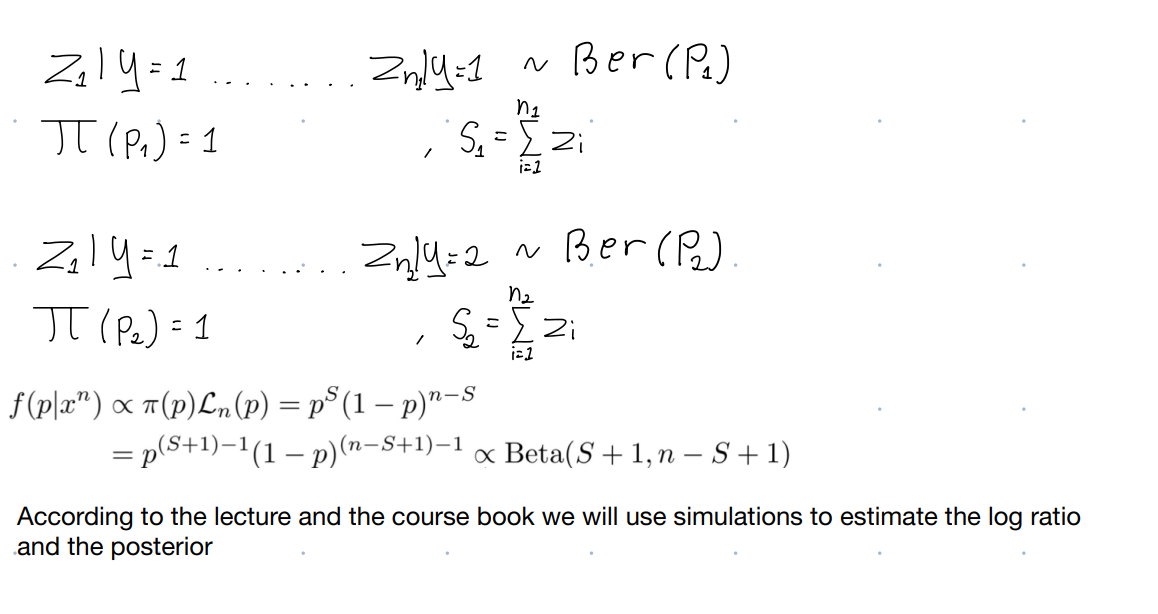

In [5]:
#Q2.3
import numpy as np
from scipy.stats import beta

s1 =len(df[(df.Won_a_medal==0) & (df.height > 1.76)])
s2 = len(df[(df.Won_a_medal==1) & (df.height > 1.76)])
n1 = len(df[(df.Won_a_medal==0)])
n2 =  len(df[(df.Won_a_medal==1)])
p1_list =[]
p2_list = []
log_ratio_list = []
for i in range(B):
  p1 = np.random.beta(s1+0.5,n1-s1+0.5)
  p2 = np.random.beta(s2+1,n2-s2+1)
  eta1 = np.log(p1/(1-p1))
  eta2 = np.log(p2/(1-p2))
  log_ratio_list.append(eta1 - eta2)


log_ratio = np.mean(log_ratio_list)
log_ratio_list = np.array(sorted(log_ratio_list))
low_q = np.quantile(log_ratio_list, 0.025)
up_q = np.quantile(log_ratio_list, 0.975)
CI_quantile = [low_q, up_q]
print("estimation of log ratio is:",log_ratio)

print(f'Credible interval for log ratio based on uniform prior is : {CI_quantile}')


estimation of log ratio is: -0.565828444661732
Credible interval for log ratio based on uniform prior is : [-1.3440745220805097, 0.13854565156319246]


As we can see, we recieved a very similar credible interval to Q2.2. This is probably due to the fact that in both cases we used a non-informative prior.

Therefore both priors were unhelpfull in defining the posterior, and the majority of the posterior's weight came from the dataset itself.

In [6]:
#Q2.4
s1_old =len(athletes_1000[(athletes_1000.Won_a_medal==0) & (athletes_1000.height > 1.76)]) 
s2_old = len(athletes_1000[(athletes_1000.Won_a_medal==1) & (athletes_1000.height > 1.76)]) 
n1_old = len(athletes_1000[(athletes_1000.Won_a_medal==0)])
n2_old =  len(athletes_1000[(athletes_1000.Won_a_medal==1)])


s1 =len(df[(df.Won_a_medal==0) & (df.height > 1.76)])
s2 = len(df[(df.Won_a_medal==1) & (df.height > 1.76)])
n1 = len(df[(df.Won_a_medal==0)])
n2 =  len(df[(df.Won_a_medal==1)])
p1_list =[]
p2_list = []
log_ratio_list = []

for i in range(B):
  p1 = np.random.beta(s1+s1_old +1,n1+n1_old-s1-s1_old+1)
  p2 = np.random.beta(s2+s2_old +1,n2+n2_old-s2-s2_old+1)
  eta1 = np.log(p1/(1-p1))
  eta2 = np.log(p2/(1-p2))
  log_ratio_list.append(eta1 - eta2)


log_ratio = np.mean(log_ratio_list)
log_ratio_list = np.array(sorted(log_ratio_list))
low_q = np.quantile(log_ratio_list, 0.025)
up_q = np.quantile(log_ratio_list, 0.975)
CI_quantile = [low_q, up_q]
print("estimation of log ratio is:",log_ratio)

print(f'Credible interval for log ratio based on beta prior is : {CI_quantile}')




estimation of log ratio is: -0.5530562397306276
Credible interval for log ratio based on beta prior is : [-0.8472494698292369, -0.22814272523143436]


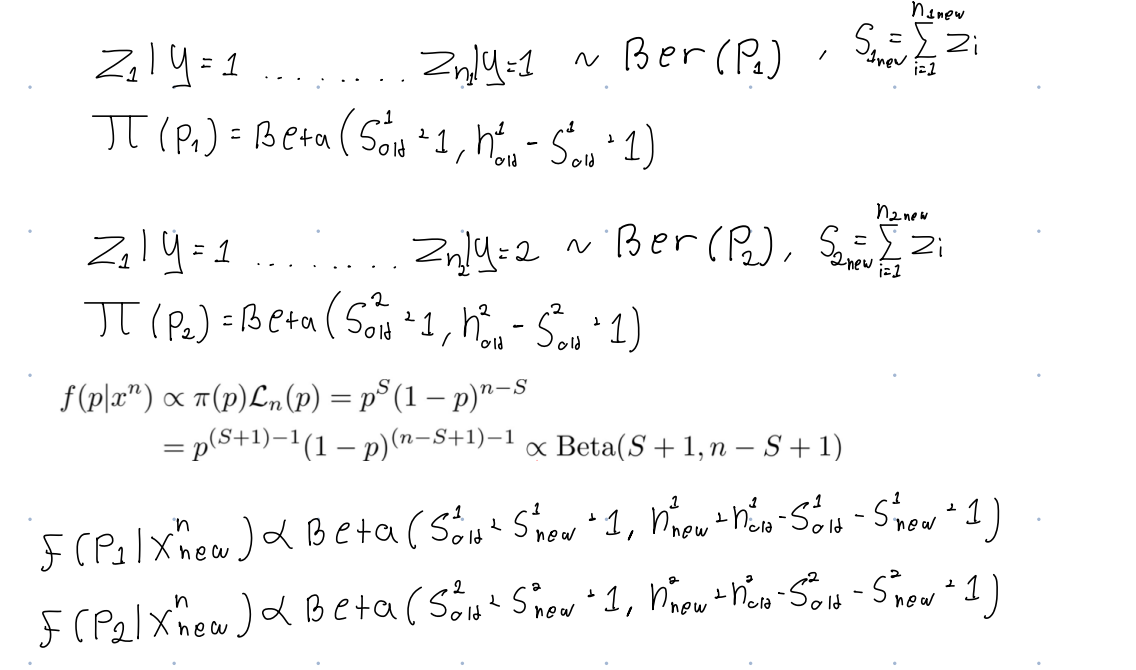

#Question 1.5:
We have created 3 different credible intervals for 𝚿.

The first two were with flat priors, and the last one was with a prior of beta distribution.

The two credible intervals, using flat priors were very similar showed similar charisteristics. This is reasonable considering that they didnt contain any information of past knowledge.

As we can see, the last credible interval is the smallest. That is, the beta prior showed to be the best amongt all. By knowing more about where the data comes from were able to achieve better results.



# Part 2: Missing Data

Research Question:

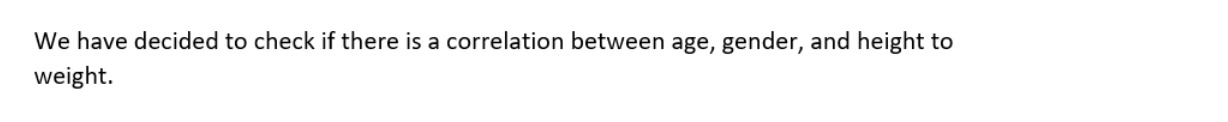

In [7]:
#Q1
ci_dict ={'b0':{},'b1':{}, 'b2':{}, 'b3':{}}
full_athlete_df= full_athlete_df.dropna()
df=full_athlete_df.sample(n=1000,ignore_index=True)
# df.reset_index()
# athletes_1000 = pd.concat([ full_athlete_df, df]).drop_duplicates(keep=False)

b0_ci_list=[]
b1_ci_list=[]
b2_ci_list=[]
b3_ci_list=[]


athletes_1000 = df.copy(deep=True)
df


,sex,dob,height,weight,sport,country,population,gdp_per_capita,Won_a_medal
0,1,16.0,1.57,52.0,weightlifting,Latvia,1978440.0,13648.547556,0
1,0,24.0,1.84,73.0,volleyball,Poland,37999494.0,12554.547554,0
2,0,28.0,1.87,81.0,athletics,Mexico,127017224.0,9005.024265,0
3,0,21.0,1.78,71.0,gymnastics,United Kingdom,65138232.0,43875.969614,0
4,1,26.0,1.72,63.0,football,Sweden,9798871.0,50579.673649,1
...,...,...,...,...,...,...,...,...,...
995,1,30.0,1.79,48.0,athletics,Saint Lucia,184999.0,7735.910484,0
996,1,30.0,1.56,41.0,athletics,Japan,126958472.0,32477.215145,0
997,1,28.0,1.64,54.0,hockey,Netherlands,16936520.0,44299.768085,1
998,1,33.0,1.65,52.0,gymnastics,Belarus,9513000.0,5740.456495,0


In [8]:
#Q2

from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from scipy.stats import norm

y= df["Won_a_medal"].values
X=df

x_df = df[['dob','sex','height']]
y_df = df[['weight']]
y_matrix = y_df.to_numpy()
x_matrix = x_df.to_numpy()
x_matrix = np.c_[np.ones(x_matrix.shape[0]), x_matrix]
n = x_matrix.shape[0]
p = x_matrix.shape[1]

b_vec = np.matmul(x_matrix.T,x_matrix)
b_vec = np.linalg.inv(b_vec)
b_vec = np.matmul(b_vec,x_matrix.T)
b_vec = np.matmul(b_vec,y_matrix)
print("The model is:")
print("y = %5.10f + %5.10f*x1 + %5.10f*x2 + %5.10f*x3" % (b_vec[0][0],b_vec[1][0],
     b_vec[2][0],b_vec[3][0]))
print("Beta vector is:" ,b_vec )
print("Where: ")
for i,x in enumerate(['age','gender','height']):
  print(f"x{i+1} = {x}")

The model is:
y = -95.0334943024 + 0.1433184466*x1 + -5.7878320264*x2 + 94.0216399597*x3
Beta vector is: [[-95.0334943 ]
 [  0.14331845]
 [ -5.78783203]
 [ 94.02163996]]
Where: 
x1 = age
x2 = gender
x3 = height


In [9]:
x_df = df[['dob','sex','height']]
y_df = df[['weight']]
y_matrix = y_df.to_numpy()
x_matrix = x_df.to_numpy()
x_matrix = np.c_[np.ones(x_matrix.shape[0]), x_matrix]
n = x_matrix.shape[0]
p = x_matrix.shape[1]

b_vec = np.matmul(x_matrix.T,x_matrix)
b_vec = np.linalg.inv(b_vec)
b_vec = np.matmul(b_vec,x_matrix.T)
b_vec = np.matmul(b_vec,y_matrix)


C = np.linalg.inv(x_matrix.T@x_matrix)
e = y_matrix - np.dot(x_matrix, b_vec)
var_beta = 1/(n-p)*sum([x**2 for x in e])


len_cov = []
z = norm.ppf(0.975) # normal statistic of  desired interval size
for i in range(len(b_vec)):
  ci_dict['b'+str(i)]["full_data"]=[]
  an =  b_vec[i]-z*np.sqrt(var_beta*C[i][i])
  bn =  b_vec[i]+ z*np.sqrt(var_beta*C[i][i])
  len_cov.append(bn-an)
  if i ==0:
    b0_ci_list.append(bn[0]-an[0])
  elif i ==1:
    b1_ci_list.append(bn[0]-an[0])
  elif i ==2:
    b2_ci_list.append(bn[0]-an[0])
  elif i ==3:
    b3_ci_list.append(bn[0]-an[0])
  ci_dict['b'+str(i)]["full_data"].extend([an[0],bn[0]])
  print(f"95% Confidence Interval For beta_{i} estimator is: ({an},{bn}). \n\t\t\t\t\t\t\tis beta_{i} estimator for whole-dataset in CI? {an<=b_vec[i]<=bn}\n")

95% Confidence Interval For beta_0 estimator is: ([-108.02780699],[-82.03918161]). 
							is beta_0 estimator for whole-dataset in CI? [ True]

95% Confidence Interval For beta_1 estimator is: ([0.01954045],[0.26709644]). 
							is beta_1 estimator for whole-dataset in CI? [ True]

95% Confidence Interval For beta_2 estimator is: ([-7.41844237],[-4.15722169]). 
							is beta_2 estimator for whole-dataset in CI? [ True]

95% Confidence Interval For beta_3 estimator is: ([87.0915887],[100.95169122]). 
							is beta_3 estimator for whole-dataset in CI? [ True]



In [10]:
df.sort_values(by=['weight'],ignore_index=True)
df_none = df.copy()
df_none

,sex,dob,height,weight,sport,country,population,gdp_per_capita,Won_a_medal
0,1,16.0,1.57,52.0,weightlifting,Latvia,1978440.0,13648.547556,0
1,0,24.0,1.84,73.0,volleyball,Poland,37999494.0,12554.547554,0
2,0,28.0,1.87,81.0,athletics,Mexico,127017224.0,9005.024265,0
3,0,21.0,1.78,71.0,gymnastics,United Kingdom,65138232.0,43875.969614,0
4,1,26.0,1.72,63.0,football,Sweden,9798871.0,50579.673649,1
...,...,...,...,...,...,...,...,...,...
995,1,30.0,1.79,48.0,athletics,Saint Lucia,184999.0,7735.910484,0
996,1,30.0,1.56,41.0,athletics,Japan,126958472.0,32477.215145,0
997,1,28.0,1.64,54.0,hockey,Netherlands,16936520.0,44299.768085,1
998,1,33.0,1.65,52.0,gymnastics,Belarus,9513000.0,5740.456495,0


In [11]:
from pandas.core.groupby.groupby import F
#Q3:
def choose_delete(index):
  p = np.random.random()
  if index <=100 and p >0.9:
    return True
  elif 100<index<=200 and p>0.85:
    return True
  elif 200<index<=300 and p>0.80:
    return True
  elif 300<index<=400 and p>0.75:
    return True
  elif 400<index<=500 and p>0.65:
    return True
  elif 500<index<=600 and p>0.6:
    return True
  elif 600<index<=700 and p>0.55:
    return True
  elif 700<index<=800 and p>0.5:
    return True
  elif 800<index<=900 and p>0.45:
    return True
  elif 900<index<=1000 and p>0.4:
    return True
  return False
  
remove_index = set()
while len(remove_index) <500:
  for i in range(1000):
    if choose_delete(i):
      remove_index.add(i)
    if len(remove_index) ==500:
      break
df.drop(remove_index, axis=0, inplace=True)

In [12]:
print(len(df))
df_none = pd.concat([ df_none, df]).drop_duplicates(keep=False)
print(len(df_none))
df

500
500


,sex,dob,height,weight,sport,country,population,gdp_per_capita,Won_a_medal
2,0,28.0,1.87,81.0,athletics,Mexico,127017224.0,9005.024265,0
3,0,21.0,1.78,71.0,gymnastics,United Kingdom,65138232.0,43875.969614,0
4,1,26.0,1.72,63.0,football,Sweden,9798871.0,50579.673649,1
5,1,21.0,1.62,54.0,table tennis,Egypt,91508084.0,3614.746766,0
8,0,29.0,1.87,100.0,judo,Ukraine,45198200.0,2114.954716,0
...,...,...,...,...,...,...,...,...,...
987,1,20.0,1.56,50.0,sailing,Singapore,5535002.0,52888.744672,0
991,0,38.0,1.80,85.0,shooting,Italy,60802085.0,29957.804315,0
993,0,28.0,2.08,120.0,basketball,Brazil,207847528.0,8538.589975,0
997,1,28.0,1.64,54.0,hockey,Netherlands,16936520.0,44299.768085,1


In [13]:
# Q4.1
y= df["Won_a_medal"].values
X=df

x_df = df[['dob','sex','height']]
y_df = df[['weight']]
y_matrix = y_df.to_numpy()
x_matrix = x_df.to_numpy()
x_matrix = np.c_[np.ones(x_matrix.shape[0]), x_matrix]
n = x_matrix.shape[0]
p = x_matrix.shape[1]

b_vec = np.matmul(x_matrix.T,x_matrix)
b_vec = np.linalg.inv(b_vec)
b_vec = np.matmul(b_vec,x_matrix.T)
b_vec = np.matmul(b_vec,y_matrix)
print("The model based on only 500 data points is:")
print("y = %5.10f + %5.10f*x1 + %5.10f*x2 + %5.10f*x3" % (b_vec[0][0],b_vec[1][0],
     b_vec[2][0],b_vec[3][0]))
print("Beta vector is:" ,b_vec )
print("Where: ")
for i,x in enumerate(['age','gender','height']):
  print(f"x{i+1} = {x}")

The model based on only 500 data points is:
y = -94.6622426886 + 0.1414299533*x1 + -4.5539239244*x2 + 93.3548725061*x3
Beta vector is: [[-94.66224269]
 [  0.14142995]
 [ -4.55392392]
 [ 93.35487251]]
Where: 
x1 = age
x2 = gender
x3 = height


In [14]:
# Q4.1 CI FOR BETA ESTIMATORS Based on 500 datapoints & covarieance matrix


x_df = df[['dob','sex','height']]
y_df = df[['weight']]
y_matrix = y_df.to_numpy()
x_matrix = x_df.to_numpy()
x_matrix = np.c_[np.ones(x_matrix.shape[0]), x_matrix]
n = x_matrix.shape[0]
p = x_matrix.shape[1]

b_vec = np.matmul(x_matrix.T,x_matrix)
b_vec = np.linalg.inv(b_vec)
b_vec = np.matmul(b_vec,x_matrix.T)
b_vec = np.matmul(b_vec,y_matrix)


C = np.linalg.inv(x_matrix.T@x_matrix)
e = y_matrix - np.dot(x_matrix, b_vec)
var_beta = 1/(n-p)*sum([x**2 for x in e])


len_cov = []
z = norm.ppf(0.975) # normal statistic of  desired interval size
for i in range(len(b_vec)):
  ci_dict['b'+str(i)]["500d_datapoints"]=[]

  an =  b_vec[i]-z*np.sqrt(var_beta*C[i][i])
  bn =  b_vec[i]+ z*np.sqrt(var_beta*C[i][i])
  len_cov.append(bn-an)
  if i ==0:
    b0_ci_list.append(bn[0]-an[0])
  if i ==1:
    b1_ci_list.append(bn[0]-an[0])
  if i ==2:
    b2_ci_list.append(bn[0]-an[0])
  if i ==3:
    b3_ci_list.append(bn[0]-an[0])
  ci_dict['b'+str(i)]["500d_datapoints"].extend([an[0],bn[0]])
  print(f"95% Confidence Interval For beta_{i} estimator is: ({an},{bn}). \n\t\t\t\t\t\t\tis beta_{i} estimator for whole-dataset in CI? {an<=b_vec[i]<=bn}\n")

95% Confidence Interval For beta_0 estimator is: ([-113.336155],[-75.98833037]). 
							is beta_0 estimator for whole-dataset in CI? [ True]

95% Confidence Interval For beta_1 estimator is: ([-0.03534021],[0.31820012]). 
							is beta_1 estimator for whole-dataset in CI? [ True]

95% Confidence Interval For beta_2 estimator is: ([-6.89871094],[-2.20913691]). 
							is beta_2 estimator for whole-dataset in CI? [ True]

95% Confidence Interval For beta_3 estimator is: ([83.36362667],[103.34611834]). 
							is beta_3 estimator for whole-dataset in CI? [ True]



In [16]:
##Q4.2  regression imputation:

x_none = df_none[['dob','sex','height']]
x_none = x_none.to_numpy()
x_none = np.c_[np.ones(x_none.shape[0]), x_none]
n = x_none.shape[0]
p = x_none.shape[1]

y_pred =  np.matmul(x_none,b_vec)
# print("The 100 predections are :",y_pred)
# print(type(y_pred))

In [17]:
df_none = df_none.drop(['weight'], axis =1)
y_pred = y_pred.T

df_none['weight'] = y_pred[0].tolist()
print("The 500 predections after we used regression imputation :")
df_none

The 500 predections after we used regression imputation :


,sex,dob,height,sport,country,population,gdp_per_capita,Won_a_medal,weight
0,1,16.0,1.57,weightlifting,Latvia,1978440.0,13648.547556,0,49.613862
1,0,24.0,1.84,volleyball,Poland,37999494.0,12554.547554,0,80.505042
6,1,25.0,1.67,aquatics,Netherlands,16936520.0,44299.768085,0,60.222219
7,1,20.0,1.79,athletics,Ukraine,45198200.0,2114.954716,0,70.717654
12,0,24.0,1.80,sailing,Tunisia,11107800.0,3872.512084,0,76.770847
...,...,...,...,...,...,...,...,...,...
992,1,27.0,1.74,athletics,Uzbekistan,31299500.0,2132.070368,0,67.039920
994,1,27.0,1.70,taekwondo,Croatia,4224404.0,11535.829356,0,63.305725
995,1,30.0,1.79,athletics,Saint Lucia,184999.0,7735.910484,0,72.131954
996,1,30.0,1.56,athletics,Japan,126958472.0,32477.215145,0,50.660333


In [18]:
df_reg = pd.concat([ df_none, df])
df_500 = df.copy()
df = df_reg
df

,sex,dob,height,sport,country,population,gdp_per_capita,Won_a_medal,weight
0,1,16.0,1.57,weightlifting,Latvia,1978440.0,13648.547556,0,49.613862
1,0,24.0,1.84,volleyball,Poland,37999494.0,12554.547554,0,80.505042
6,1,25.0,1.67,aquatics,Netherlands,16936520.0,44299.768085,0,60.222219
7,1,20.0,1.79,athletics,Ukraine,45198200.0,2114.954716,0,70.717654
12,0,24.0,1.80,sailing,Tunisia,11107800.0,3872.512084,0,76.770847
...,...,...,...,...,...,...,...,...,...
987,1,20.0,1.56,sailing,Singapore,5535002.0,52888.744672,0,50.000000
991,0,38.0,1.80,shooting,Italy,60802085.0,29957.804315,0,85.000000
993,0,28.0,2.08,basketball,Brazil,207847528.0,8538.589975,0,120.000000
997,1,28.0,1.64,hockey,Netherlands,16936520.0,44299.768085,1,54.000000


In [19]:
#Q4.2
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from scipy.stats import norm

y= df["Won_a_medal"].values
X=df

x_df = df[['dob','sex','height']]
y_df = df[['weight']]
y_matrix = y_df.to_numpy()
x_matrix = x_df.to_numpy()
x_matrix = np.c_[np.ones(x_matrix.shape[0]), x_matrix]
n = x_matrix.shape[0]
p = x_matrix.shape[1]

b_vec = np.matmul(x_matrix.T,x_matrix)
b_vec = np.linalg.inv(b_vec)
b_vec = np.matmul(b_vec,x_matrix.T)
b_vec = np.matmul(b_vec,y_matrix)
print("The model based on imputation regression is:")
print("y = %5.10f + %5.10f*x1 + %5.10f*x2 + %5.10f*x3" % (b_vec[0][0],b_vec[1][0],
     b_vec[2][0],b_vec[3][0]))
print("Beta vector is:" ,b_vec )
print("Where: ")
for i,x in enumerate(['age','gender','height']):
  print(f"x{i+1} = {x}")

The model based on imputation regression is:
y = -94.6622426886 + 0.1414299533*x1 + -4.5539239244*x2 + 93.3548725061*x3
Beta vector is: [[-94.66224269]
 [  0.14142995]
 [ -4.55392392]
 [ 93.35487251]]
Where: 
x1 = age
x2 = gender
x3 = height


In [20]:
# Q4.2 CI FOR BETA ESTIMATORS Based on 500 datapoints & Regressin imputation


x_df = df[['dob','sex','height']]
y_df = df[['weight']]
y_matrix = y_df.to_numpy()
x_matrix = x_df.to_numpy()
x_matrix = np.c_[np.ones(x_matrix.shape[0]), x_matrix]
n = x_matrix.shape[0]
p = x_matrix.shape[1]

b_vec = np.matmul(x_matrix.T,x_matrix)
b_vec = np.linalg.inv(b_vec)
b_vec = np.matmul(b_vec,x_matrix.T)
b_vec = np.matmul(b_vec,y_matrix)


C = np.linalg.inv(x_matrix.T@x_matrix)
e = y_matrix - np.dot(x_matrix, b_vec)
var_beta = 1/(n-p)*sum([x**2 for x in e])

len_cov = []
z = norm.ppf(0.975) # normal statistic of  desired interval size
for i in range(len(b_vec)):
  ci_dict['b'+str(i)]["regression_imputation"]=[]

  an =  b_vec[i]-z*np.sqrt(var_beta*C[i][i])
  bn =  b_vec[i]+ z*np.sqrt(var_beta*C[i][i])
  len_cov.append(bn-an)
  if i ==0:
    b0_ci_list.append(bn[0]-an[0])
  elif i ==1:
    b1_ci_list.append(bn[0]-an[0])
  elif i ==2:
    b2_ci_list.append(bn[0]-an[0])
  elif i ==3:
    b3_ci_list.append(bn[0]-an[0])
  ci_dict['b'+str(i)]["regression_imputation"].extend([an[0],bn[0]])

  print(f"95% Confidence Interval For beta_{i} estimator is: ({an},{bn}). \n\t\t\t\t\t\t\tis beta_{i} estimator for whole-dataset in CI? {an<=b_vec[i]<=bn}\n")

95% Confidence Interval For beta_0 estimator is: ([-103.78917774],[-85.53530764]). 
							is beta_0 estimator for whole-dataset in CI? [ True]

95% Confidence Interval For beta_1 estimator is: ([0.05449086],[0.22836904]). 
							is beta_1 estimator for whole-dataset in CI? [ True]

95% Confidence Interval For beta_2 estimator is: ([-5.69923072],[-3.40861713]). 
							is beta_2 estimator for whole-dataset in CI? [ True]

95% Confidence Interval For beta_3 estimator is: ([88.48734859],[98.22239642]). 
							is beta_3 estimator for whole-dataset in CI? [ True]



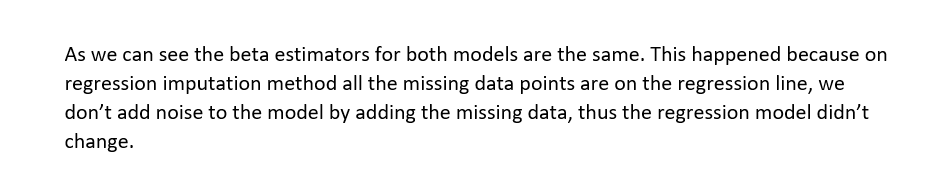

In [21]:
from pandas.core.groupby.groupby import F

df_reduced=athletes_1000.copy(deep=True)

df_reduced.drop(remove_index, axis=0, inplace=True)


In [22]:
df_reduced

,sex,dob,height,weight,sport,country,population,gdp_per_capita,Won_a_medal
2,0,28.0,1.87,81.0,athletics,Mexico,127017224.0,9005.024265,0
3,0,21.0,1.78,71.0,gymnastics,United Kingdom,65138232.0,43875.969614,0
4,1,26.0,1.72,63.0,football,Sweden,9798871.0,50579.673649,1
5,1,21.0,1.62,54.0,table tennis,Egypt,91508084.0,3614.746766,0
8,0,29.0,1.87,100.0,judo,Ukraine,45198200.0,2114.954716,0
...,...,...,...,...,...,...,...,...,...
987,1,20.0,1.56,50.0,sailing,Singapore,5535002.0,52888.744672,0
991,0,38.0,1.80,85.0,shooting,Italy,60802085.0,29957.804315,0
993,0,28.0,2.08,120.0,basketball,Brazil,207847528.0,8538.589975,0
997,1,28.0,1.64,54.0,hockey,Netherlands,16936520.0,44299.768085,1


In [23]:
def beta_for(dataframe):
  x_df = dataframe[['dob','sex','height']]
  y_df = dataframe[['weight']]
  y_matrix = y_df.to_numpy()
  x_matrix = x_df.to_numpy()
  x_matrix = np.c_[np.ones(x_matrix.shape[0]), x_matrix]
  n = x_matrix.shape[0]
  p = x_matrix.shape[1]

  xtx = np.matmul(x_matrix.T,x_matrix)
  C = np.linalg.inv(xtx)
  xTy = np.matmul(x_matrix.T,y_matrix)
  b_vec = np.matmul(C,xTy)
  b_vec=np.array([x[0] for x in b_vec])
  y_matrix=np.array([y[0] for y in y_matrix])
  e = y_matrix - np.dot(x_matrix, b_vec)
  var_estimate = 1/(n-p)*sum([x**2 for x in e])
  variances_mat= np.zeros(4)
  for i in range(4):
    variances_mat[i] =  var_estimate*C[i][i]

  return b_vec, variances_mat

In [24]:
df=athletes_1000.copy(deep=True)

In [25]:
#Q2.4.3

for i in remove_index:
  df['weight'][i]=None

miu , sigma = df_reduced['weight'].mean(),  df_reduced['weight'].var(ddof=0)
import math
M=5
beta_list =[]
beta_m=np.zeros(4)
miu_hat = np.zeros(5)
var_M = np.zeros((M,4))
for m in range(M):
  mi_df = df.copy(deep=True)
  for j,w in enumerate(mi_df['weight']):
    if pd.isna(w):
      mi_df['weight'][j]= np.random.normal(loc=miu, scale=sigma)

  b_vec, var = beta_for(mi_df)
  for i in range(4):
    var_M[m][i]= var[i]
  beta_list.append([v for v in b_vec])
  for i in range(len(beta_m)):
    beta_m[i]+=b_vec[i]


print("\nEstimator for linear regression explanatory variables is :",beta_m/M)

<ipython-input-25-88953cb67a61>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight'][i]=None
<ipython-input-25-88953cb67a61>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mi_df['weight'][j]= np.random.normal(loc=miu, scale=sigma)



Estimator for linear regression explanatory variables is : [68.40975885 -0.44997639 -8.78251132 10.30648631]


In [26]:
print("\nEstimators for linear regression explanatory variables is :",beta_m/M)


Estimators for linear regression explanatory variables is : [68.40975885 -0.44997639 -8.78251132 10.30648631]


In [27]:
final_ols=beta_m/M
beta_se_estimates = [0]*4
variances_avg = 1/M*var_M.sum(axis=0)
rubin_variances = [0]*4
for i in range(len(beta_se_estimates)):
  beta_estimators = [beta[i] for beta in beta_list]
  beta_distances = sum([(x-final_ols[i])**2 for x in beta_estimators])
  rubin_variances[i] = variances_avg[i] + (M+1)/(M*(M-1))*beta_distances

se_hats = [x**(1/2) for x in rubin_variances]
print(f"S.E estimators: {se_hats}")

S.E estimators: [131.23697404125798, 1.9781824930085679, 17.300287823844553, 75.5800255689375]


In [28]:
#Q2.4.4
norm_quantile = norm.ppf(0.975)
all_CI = []
for i, variable in zip(range(final_ols.shape[0]), ['X0','dob','sex','height']):
  ci_dict['b'+str(i)]["multiple_imputation"]=[]
  std_estimate = se_hats[i]
  CI_beta_i = [final_ols[i] - norm_quantile*std_estimate, final_ols[i] + norm_quantile*std_estimate]
  all_CI.append(CI_beta_i)
  if i ==0:
    b0_ci_list.append(CI_beta_i[1]-CI_beta_i[0])
  if i ==1:
    b1_ci_list.append(CI_beta_i[1]-CI_beta_i[0])
  if i ==2:
    b2_ci_list.append(CI_beta_i[1]-CI_beta_i[0])
  if i ==3:
    b3_ci_list.append(CI_beta_i[1]-CI_beta_i[0])
  ci_dict['b'+str(i)]["multiple_imputation"].extend([an[0],bn[0]])
  print(f"CI for beta {i} ({variable}) is: {CI_beta_i}")


CI for beta 0 (X0) is: [-188.80998370869784, 325.6295014130694]
CI for beta 1 (dob) is: [-4.327142834289447, 3.427190047999454]
CI for beta 2 (sex) is: [-42.69045237735021, 25.12542973647409]
CI for beta 3 (height) is: [-137.82764175661973, 158.44061437484808]


In [29]:
#Q4.5
x_none = df_none[['dob','sex','height']]
x_none['weight'] = 0


<ipython-input-29-0affbf3254a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_none['weight'] = 0


In [30]:
x_df =df_500[['dob','sex','height']]
x_df['weight'] = 1

<ipython-input-30-d43dcfebdfaf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['weight'] = 1


In [31]:
x_logistic = pd.concat([ x_df,x_none])
x = x_logistic[['dob','sex','height']]
y = x_logistic['weight']
x.insert(0, "x0", 1)
reg = LogisticRegression(penalty="none", fit_intercept=False).fit(x, y)
beta = reg.coef_[0]
print("We have found that estimator for 200 data items b*  to the model is: ",beta)

We have found that estimator for 200 data items b*  to the model is:  [-0.29714636 -0.01517648 -0.0608106   0.39414904]


In [32]:
np.shape(reg.predict_proba(x))
prob = reg.predict_proba(x).T
beta_reg = reg.coef_[0]
print("The probability of R = , given the independent variables for each row is: ")
print(prob[1])


The probability of R = , given the independent variables for each row is: 
[0.50374266 0.5214201  0.48135638 0.49046576 0.49994861 0.50807941
 0.54828324 0.47113026 0.54217297 0.53894352 0.52299185 0.50527117
 0.51807333 0.53571079 0.51876303 0.53948344 0.49159814 0.51876303
 0.54114854 0.47643833 0.51876303 0.51524157 0.49090772 0.51201929
 0.5070681  0.54676842 0.50411236 0.521273   0.53041136 0.50017096
 0.53698414 0.48303026 0.52982401 0.47017437 0.50541852 0.49987622
 0.53767092 0.44508264 0.48908508 0.48864319 0.51201929 0.49334614
 0.52896283 0.57076682 0.48485175 0.51822051 0.52812756 0.48066675
 0.49652427 0.50699313 0.51891019 0.5013037  0.45154323 0.45425273
 0.49721487 0.46843256 0.50132987 0.47068965 0.48120922 0.50145107
 0.45335011 0.49258327 0.53095257 0.48393966 0.54075531 0.5065511
 0.50411236 0.45063899 0.49221363 0.48893778 0.51297789 0.48773071
 0.46872614 0.5222565  0.51115558 0.5409017  0.5371307  0.49440633
 0.47963678 0.52997086 0.51034412 0.52087781 0.503965  

In [33]:
beta_reg = reg.coef_[0]

print(beta_reg)


[-0.29714636 -0.01517648 -0.0608106   0.39414904]


In [34]:
#Q4.6

prob_list = []
for i in range(500):  
  prob_list.append(1/prob[1][i])

w = np.diag(prob_list)




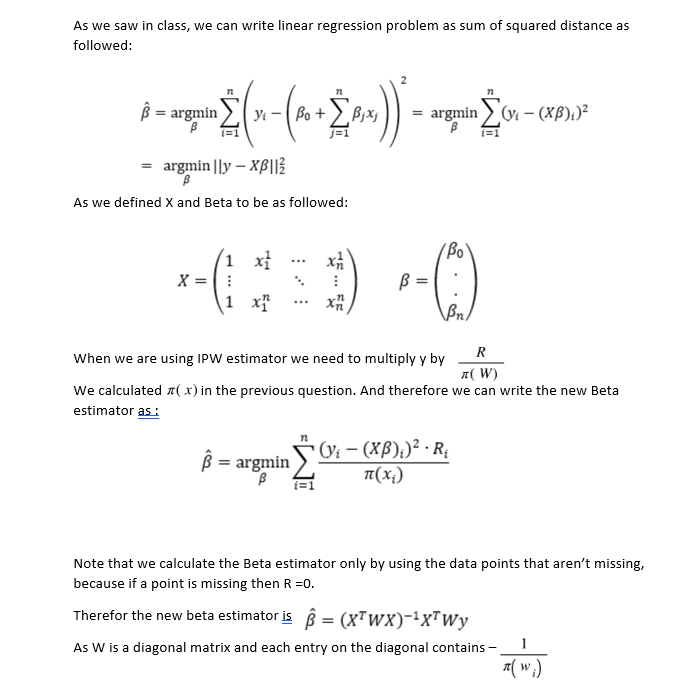

In [35]:
#Q4.6


x_df = df_500[['dob','sex','height']]
y_df = df_500[['weight']]
y_matrix = y_df.to_numpy()
x_matrix = x_df.to_numpy()
x_matrix = np.c_[np.ones(x_matrix.shape[0]), x_matrix]
n = x_matrix.shape[0]
p = x_matrix.shape[1]

b_vec = np.matmul(x_matrix.T,w)
b_vec = np.matmul(b_vec,x_matrix)
b_vec = np.linalg.inv(b_vec)
b_vec = np.matmul(b_vec,x_matrix.T)
b_vec = np.matmul(b_vec,w)
b_vec = np.matmul(b_vec,y_matrix)
print("The model based on IPW estimators data points is:")
print("y = %5.10f + %5.10f*x1 + %5.10f*x2 + %5.10f*x3" % (b_vec[0][0],b_vec[1][0],
     b_vec[2][0],b_vec[3][0]))
print("IPW Beta vector is:" ,b_vec )
print("Where: ")
for i,x in enumerate(['age','gender','height']):
  print(f"x{i+1} = {x}")

The model based on IPW estimators data points is:
y = -94.8580468037 + 0.1297177864*x1 + -4.5372930968*x2 + 93.6218778483*x3
IPW Beta vector is: [[-94.8580468 ]
 [  0.12971779]
 [ -4.5372931 ]
 [ 93.62187785]]
Where: 
x1 = age
x2 = gender
x3 = height


In [36]:
#4.7
def pi(x,beta_reg):
  logit = np.matmul(x,beta_reg)
  return 1/(np.exp(logit)/(1+np.exp(logit)))
  

In [37]:
B=400
b0_list =[]
b1_list =[]
b2_list = []
b3_list =[]
for i in range(B):
  bootstrap = df_500.sample(n=500,replace=True)
  x_df = bootstrap[['dob','sex','height']]
  y_df = bootstrap[['weight']]
  y_matrix = y_df.to_numpy()
  x_matrix = x_df.to_numpy()
  x_matrix = np.c_[np.ones(x_matrix.shape[0]), x_matrix]
  n = x_matrix.shape[0]
  p = x_matrix.shape[1]
  
  prob = [(pi(x_matrix[i], beta_reg)) for i in range(x_matrix.shape[0])]
  w = np.diag(prob)

  b_vec = np.matmul(x_matrix.T,w)
  b_vec = np.matmul(b_vec,x_matrix)
  b_vec = np.linalg.inv(b_vec)
  b_vec = np.matmul(b_vec,x_matrix.T)
  b_vec = np.matmul(b_vec,w)
  b_vec = np.matmul(b_vec,y_matrix)
  b0_list.append(b_vec[0][0])
  b1_list.append(b_vec[1][0])
  b2_list.append(b_vec[2][0])
  b3_list.append(b_vec[3][0])

b0_list = np.array(sorted(b0_list))
b0_low_q = np.quantile(b0_list, 0.025)
b0_up_q = np.quantile(b0_list, 0.975)
CI_quantile_b0 = [b0_low_q,b0_up_q]
b0_ci_list.append(b0_up_q-b0_low_q)
ci_dict['b0']["Bootstrap IPW"]=[]

ci_dict['b0']["Bootstrap IPW"].extend(CI_quantile_b0)
print(f'Confidence interval for b0 based on quantile is : {CI_quantile_b0}')

b1_list = np.array(sorted(b1_list))
b1_low_q = np.quantile(b1_list, 0.025)
b1_up_q = np.quantile(b1_list, 0.975)
CI_quantile_b1 = [b1_low_q,b1_up_q]
b1_ci_list.append(b1_up_q-b1_low_q)

ci_dict['b1']["Bootstrap IPW"]=[]

ci_dict['b1']["Bootstrap IPW"].extend(CI_quantile_b1)
print(f'Confidence interval for b1 based on quantile is : {CI_quantile_b1}')
b2_list = np.array(sorted(b2_list))
b2_low_q = np.quantile(b2_list, 0.025)
b2_up_q = np.quantile(b2_list, 0.975)
CI_quantile_b2 = [b2_low_q,b2_up_q]
b2_ci_list.append(b2_up_q-b2_low_q)

ci_dict['b2']["Bootstrap IPW"]=[]

ci_dict['b2']["Bootstrap IPW"].extend(CI_quantile_b2)
print(f'Confidence interval for b1 based on quantile is : {CI_quantile_b2}')

b3_list = np.array(sorted(b3_list))
b3_low_q = np.quantile(b3_list, 0.025)
b3_up_q = np.quantile(b3_list, 0.975)
CI_quantile_b3 = [b3_low_q,b3_up_q]
b3_ci_list.append(b3_up_q-b3_low_q)
ci_dict['b3']["Bootstrap IPW"]=[]

ci_dict['b3']["Bootstrap IPW"].extend(CI_quantile_b3)
print(f'Confidence interval for b3 based on quantile is : {CI_quantile_b3}')


Confidence interval for b0 based on quantile is : [-112.36146663232024, -80.5195463826887]
Confidence interval for b1 based on quantile is : [-0.005049564316960148, 0.2822236449492489]
Confidence interval for b1 based on quantile is : [-6.580184252916294, -2.5159536326275624]
Confidence interval for b3 based on quantile is : [85.46535264811905, 102.56137931777332]


In [38]:
df_new = pd.DataFrame({"b_0": b0_ci_list , "b_1": b1_ci_list, "b_2": b2_ci_list, "b_3": b3_ci_list})
df_new.index = ["Full data", "500 data points", "regression imputation","multiple imputation","Bootstrap IPW"]
pd.set_option('display.max_colwidth', None)
display(df_new)

,b_0,b_1,b_2,b_3
Full data,25.988625,0.247556,3.261221,13.860103
500 data points,37.347825,0.353540,4.689574,19.982492
regression imputation,18.253870,0.173878,2.290614,9.735048
multiple imputation,514.439485,7.754333,67.815882,296.268256
Bootstrap IPW,31.841920,0.287273,4.064231,17.096027


In [39]:
b0_ci_list

[25.988625376039465,
 37.34782462896561,
 18.253870106041262,
 514.4394851217672,
 31.841920249631542]

In [40]:
ci_dict

{'b0': {'full_data': [-108.02780699040633, -82.03918161436687],
  '500d_datapoints': [-113.33615500311788, -75.98833037415227],
  'regression_imputation': [-103.78917774166406, -85.5353076356228],
  'multiple_imputation': [88.48734859143792, 98.22239642071571],
  'Bootstrap IPW': [-112.36146663232024, -80.5195463826887]},
 'b1': {'full_data': [0.01954045009390923, 0.2670964431173757],
  '500d_datapoints': [-0.035340210535264815, 0.3182001170388026],
  'regression_imputation': [0.05449086210644097, 0.2283690443972187],
  'multiple_imputation': [88.48734859143792, 98.22239642071571],
  'Bootstrap IPW': [-0.005049564316960148, 0.2822236449492489]},
 'b2': {'full_data': [-7.418442366110623, -4.157221686773438],
  '500d_datapoints': [-6.898710937979899, -2.2091369107239185],
  'regression_imputation': [-5.699230723121831, -3.408617125580997],
  'multiple_imputation': [88.48734859143792, 98.22239642071571],
  'Bootstrap IPW': [-6.580184252916294, -2.5159536326275624]},
 'b3': {'full_data': [

Question 2.4.8.1:

From the graph above we can observe that CI of regression imputation is contained by the CI obtained by using the 500 datapoints dataset.

That is since we complete data by using regression without noise. 
We can see that in some of the cases, the widest CI is multiple mputation since in this method we purposly insert random noise into the data.



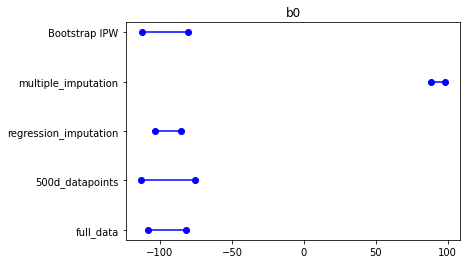

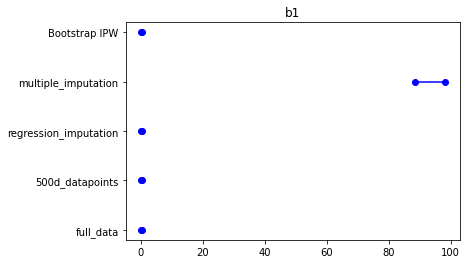

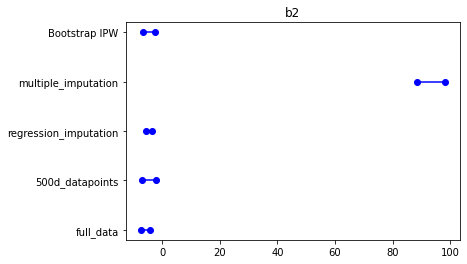

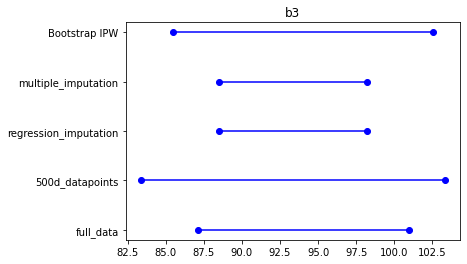

Where b0= intercept, b1= age, b2= gender, b3=height


In [41]:
#Q4.8.2:
questions = ["full_data", "500d_datapoints", "regression_imputation", "multiple_imputation", "Bootstrap IPW"]
for i, beta in enumerate(["b0", "b1", "b2", "b3"]):
  for  name, y in zip( questions, [k for k in range(len(questions))]):
    plt.plot((ci_dict[beta][name][0], ci_dict[beta][name][1]), (y,y), 'ro-', color = "blue")

  plt.title(beta)
  plt.yticks(range(len(questions)), questions)
  plt.show()
print("Where b0= intercept, b1= age, b2= gender, b3=height")